
# First exercise

Count the number of lines in Python for each file 


In [3]:
import csv
import mmap

def mapcount(filename):
    f = open(filename, "r+")
    buf = mmap.mmap(f.fileno(), 0)
    lines = 0
    readline = buf.readline
    while readline():
        lines += 1
    return lines

In [4]:
mapcount('searches.csv')

20390199

In [5]:
mapcount('bookings.csv')

10000011


# Second exercise

Print the top 10 arrival airports in the standard output, including the number of passengers.


In [6]:
import pandas as pd

In [7]:
pdbookings = pd.read_csv('bookings.csv', sep='^') #, chunkbytes=100000)  # 1MB chunks

C:\Users\onsigh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (7,8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
pdbookings.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1.0,2013.0,3.0,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1.0,2013.0,3.0,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1.0,2013.0,3.0,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1.0,2013.0,3.0,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1.0,2013.0,3.0,SYDA82546


In [9]:
paxes_arr_port = pdbookings.groupby(by=['arr_port'], group_keys=1)['pax'].sum()

In [10]:
pap = paxes_arr_port.sort_values(ascending = 0).head(10).reset_index()

In [11]:
pap

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0
5,CDG,64490.0
6,BKK,59460.0
7,MIA,58150.0
8,SFO,58000.0
9,DXB,55590.0



# Bonus

Get the name of the city or airport corresponding to that airport

Note: installation of Geobases for Python 3 on windows was tricky
see error: Unable to find vcvarsall.bat
Fix: upgrade VS to 2015 (support of Python3)


In [12]:
from GeoBases import GeoBase

In [13]:
g = GeoBase(data='ori_por', verbose=False)

In [14]:
g.get('LHR', 'city_name_utf')

'London'

In [15]:
def f(x): return g.get(x.strip(), 'city_name_utf')

In [16]:
f('LHR ')

'London'

In [17]:
pap['city'] = pap['arr_port'].apply(f)

In [18]:
pap

,arr_port,pax,city
0,LHR,88809.0,London
1,MCO,70930.0,Orlando
2,LAX,70530.0,Los Angeles
3,LAS,69630.0,Las Vegas
4,JFK,66270.0,New York City
5,CDG,64490.0,Paris
6,BKK,59460.0,Bangkok
7,MIA,58150.0,Miami
8,SFO,58000.0,San Francisco
9,DXB,55590.0,Dubai



# Third exercise: 

Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona


In [19]:
pdsearches = pd.read_csv('searches.csv', sep='^') #, chunkbytes=100000)  # 1MB chunks

C:\Users\onsigh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
pdsearches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [21]:
def mask(df, key, value):
    return df[df[key].isin(value)]

In [22]:
reducedSearches = mask(pdsearches, 'Destination', ['AGP','MAD','BCN']) #

In [23]:
reducedSearches.head(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
93,2013-01-01,20:15:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,FRA,AGP,1.0,2.0,FRA,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
113,2013-01-01,23:40:53,FXX,0028c46214bc260eb3011510a898cd42,ES,ALC,BCN,0.0,2.0,ALC,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,f024768c26f020e6243423f932c2a4de,MAD
147,2013-01-01,15:35:53,MPT,63d35a15724f95939e6d0dd0ca39be16,DE,HHN,AGP,0.0,1.0,HHN,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BRE
151,2013-01-01,10:46:21,MPT,50c54b52322080d2c257390f714f91bd,ES,FRA,MAD,0.0,1.0,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
165,2013-01-01,03:40:25,MPT,f4b923424d840c9128df27b5242feffa,US,SFO,BCN,1.0,2.0,SFO,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
177,2013-01-01,11:26:34,MPT,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,MOW,BCN,1.0,2.0,MOW,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL
186,2013-01-01,09:46:07,MPT,61880d6e0141d7ec9659ef77e29aab01,DK,CPH,BCN,1.0,2.0,CPH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
188,2013-01-01,02:07:17,CAL,b9c9a14cb66d19de74865613593d2e95,MA,NDR,BCN,1.0,2.0,NDR,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CAS
208,2013-01-01,15:58:35,FFP,99a5fa66a00828db9727aea7ebc6ae74,DE,CGN,BCN,1.0,2.0,CGN,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER


In [24]:
reducedSearches= reducedSearches.set_index(pd.DatetimeIndex(reducedSearches['Date']))

In [25]:
reducedSearchesPerMonth = reducedSearches.groupby(by=['Destination'])['Date'].resample('M').count()

In [26]:
reducedSearchesPerMonth

Destination            
AGP          2013-01-31     9633
             2013-02-28     8379
             2013-03-31    10659
             2013-04-30     8265
             2013-05-31    10830
             2013-06-30     7923
             2013-07-31     8892
             2013-08-31     7866
             2013-09-30     8151
             2013-10-31     6499
             2013-11-30     6384
             2013-12-31     3696
BCN          2013-01-31    29469
             2013-02-28    28329
             2013-03-31    30552
             2013-04-30    31236
             2013-05-31    28728
             2013-06-30    26505
             2013-07-31    29241
             2013-08-31    27075
             2013-09-30    23427
             2013-10-31    20276
             2013-11-30    19824
             2013-12-31    15400
MAD          2013-01-31    24258
             2013-02-28    22800
             2013-03-31    24681
             2013-04-30    25251
             2013-05-31    26334
             2013-0

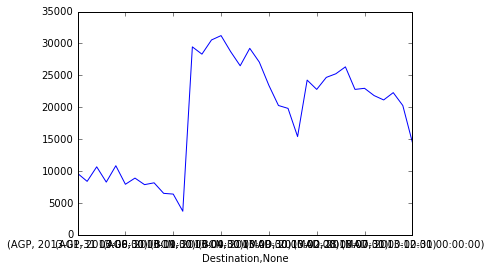

In [27]:
%matplotlib inline
reducedSearchesPerMonth.plot()

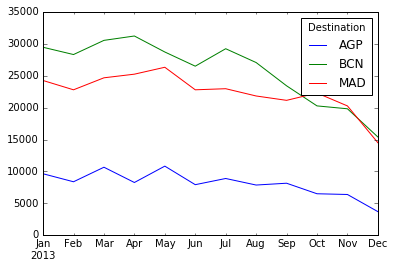

In [28]:
reducedSearchesPerMonth.unstack(level=0).plot()


# Bonus exercise

Match searches with bookings.
Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.


In [29]:
pdsearches['Origin'] = pdsearches['Origin'].map(lambda x: str(x).strip())

In [30]:
pdsearches['Destination'] = pdsearches['Destination'].map(lambda x: str(x).strip())

In [31]:
pdbookings['dep_port'] = pdbookings['dep_port'].map(lambda x: str(x).strip())

In [32]:
pdbookings['arr_port'] = pdbookings['arr_port'].map(lambda x: str(x).strip())

In [33]:
pdsearches['booked'] = (pdsearches.Origin + pdsearches.Destination).isin(pdbookings.dep_port + pdbookings.arr_port)

In [34]:
pdsearches['booked'] = pdsearches['booked'].map(lambda x: int(x))

In [ ]:
pdsearches.head(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,booked
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,1
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,0
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,1
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,1
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,1
5,2013-01-01,22:00:28,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,BLR,1.0,2.0,IAH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,1
6,2013-01-01,10:47:14,MPT,d327ca6e35cc6732d4709828327ac7c1,DK,CPH,PAR,1.0,2.0,CPH,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH,0
7,2013-01-01,23:39:49,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,PAR,DUB,1.0,2.0,PAR,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR,0
8,2013-01-01,17:08:46,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,DUS,ACE,1.0,2.0,DUS,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD,1
9,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1.0,2.0,FRA,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ,1


In [ ]:
pdsearches.to_csv('searchesbooked.csv', sep='^', encoding='utf-8')